In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

node1 = "Low"
unblankedfile1 = "/datax/scratch/vlopez/summary_data/LOW_1336-4024_beam0000_unblanked"

node2 = "Mid"  # Adjust as needed
unblankedfile2 = "/datax/scratch/vlopez/summary_data/MID_4024-6376_beam0000_unblanked"

node3 = "High"  # Adjust as needed
unblankedfile3 = "/datax/scratch/vlopez/summary_data/HIGH_6376-9064_beam0000_unblanked"

print("**********************************")
print("Beginning quick node plotter for:", node1 + "/" + unblankedfile1) 
print("Beginning quick node plotter for:", node2 + "/" + unblankedfile2) 
print("Beginning quick node plotter for:", node3 + "/" + unblankedfile3) 
print("**********************************")

# LOW
unblanked_bliss_results1 = pd.read_csv(
    unblankedfile1 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

# MID
unblanked_bliss_results2 = pd.read_csv(
    unblankedfile2 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

# HIGH
unblanked_bliss_results3 = pd.read_csv(
    unblankedfile3 + ".dat",
    skiprows=3,
    delim_whitespace=True, 
    usecols=[0, 1, 2, 3],
    names=["Top_Hit_#", "Drift_Rate", "SNR", "Uncorrected_Frequency"]
)

**********************************
Beginning quick node plotter for: Low//datax/scratch/vlopez/summary_data/LOW_1336-4024_beam0000_unblanked
Beginning quick node plotter for: Mid//datax/scratch/vlopez/summary_data/MID_4024-6376_beam0000_unblanked
Beginning quick node plotter for: High//datax/scratch/vlopez/summary_data/HIGH_6376-9064_beam0000_unblanked
**********************************


In [6]:
print((unblanked_bliss_results1))

          Top_Hit_#  Drift_Rate         SNR  Uncorrected_Frequency
0                 1   -3.928512   15.133851             999.788523
1                 2   -3.884300   15.251431             999.842901
2                 3   -0.157898   15.959664             999.826079
3                 4   -3.947460   15.070243             999.908481
4                 5   -3.852721   15.713848             999.903150
...             ...         ...         ...                    ...
27965690        472   -3.953776   17.107727            3676.249386
27965691        473   -3.953776   18.086338            3680.249388
27965692        474    3.922196   15.705231            3684.750596
27965693        475   -0.075791  181.936676            3686.994868
27965694        476    0.448431   22.171354            3687.711279

[27965695 rows x 4 columns]


In [ ]:
#LOW
blanking_rangeslow = [[1000, 1025],[1075, 1116],[1168, 1184.3],[1187, 1227],[1246, 1250],[1275, 1314],[1395, 1420.5],[1525, 1562],
                      [1572, 1580],[1671, 1705],[1775, 1802],[1811, 1813],[1899, 1901],[1927, 1945],[1951, 1980],[1990, 1996],
                      [1999, 2000.5],[2010, 2011],[2022, 2023],[2049, 2054],[2062.3, 2062.8],[2067.3, 2067.8],[2097, 2098],
                      [2110, 2154.6],[2166, 2169.5],[2179, 2203.5],[2211, 2212],[2226, 2227.5],[2237, 2241],[2244, 2248],[2257, 2258],
                      [2269, 2270.3],[2271.3, 2279],[2299, 2301],[2316, 2345],[2353, 2359.5],[2484, 2488],[2497.25, 2498.5],
                      [3264, 3274],[3341, 3343],[3492, 3493]]

'''
[2565.75, 2585],[2590, 2609],[2705, 2800],[3600, 3702]
'''

#MID
blanking_rangesmid = [[3688, 4200],[4999, 5000.9],[5048, 5049.5],[5810, 5830]]

#HIGH
blanking_rangeshigh = [[7300, 7307],[7596.5, 7604]]


In [15]:
# FILTER FOR RFI blanking only
def filter_blankinglow(df, blanking_rangeslow):
    def inside_blankingl(freq):
        return any(start <= freq <= end for start, end in blanking_rangeslow)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingl(freq))
    return df[filter].reset_index(drop=True)

filtered_low = filter_blankinglow(unblanked_bliss_results1, blanking_rangeslow)

def filter_blankingmid(df, blanking_rangesmid):
    def inside_blankingm(freq):
        return any(start <= freq <= end for start, end in blanking_rangesmid)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingm(freq))
    return df[filter].reset_index(drop=True)

filtered_mid = filter_blankingmid(unblanked_bliss_results2, blanking_rangesmid)

def filter_blankinghigh(df, blanking_rangeshigh):
    def inside_blankingh(freq):
        return any(start <= freq <= end for start, end in blanking_rangeshigh)

    filter = df['Uncorrected_Frequency'].apply(lambda freq: not inside_blankingh(freq))
    return df[filter].reset_index(drop=True)

filtered_high = filter_blankinghigh(unblanked_bliss_results3, blanking_rangeshigh)


print("LOW RAW", len(unblanked_bliss_results1))
print("LOW after RFI-blanking-only", len(filtered_low))
print("MID RAW", len(unblanked_bliss_results2))
print("MID after RFI-blanking-only", len(filtered_mid))
print("HIGH RAW", len(unblanked_bliss_results3))
print("HIGH after RFI-blanking-only", len(filtered_high))

LOW RAW 27965695
LOW after RFI-blanking-only 5159979
MID RAW 8746721
MID after RFI-blanking-only 141509
HIGH RAW 303410
HIGH after RFI-blanking-only 146743


In [16]:
# FILTER FOR DR AND RFI blanking

final_results_low = filtered_low[(filtered_low['Drift_Rate'] >= 0) & (filtered_low['Drift_Rate'] <= 1.5)]

final_results_mid = filtered_mid[(filtered_mid['Drift_Rate'] >= 0) & (filtered_mid['Drift_Rate'] <= 1.5)]

final_results_high = filtered_high[(filtered_low['Drift_Rate'] >= 0) & (filtered_high['Drift_Rate'] <= 1.5)]

print("LOW after DR & RFI", len(final_results_low))
print("MID after DR and RFI", len(final_results_mid))
print("HIGH after DR & RFI", len(final_results_high))


/tmp/ipykernel_2138330/861452929.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_results_high = filtered_high[(filtered_low['Drift_Rate'] >= 0) & (filtered_high['Drift_Rate'] <= 1.5)]


LOW after DR & RFI 1013227
MID after DR and RFI 34727
HIGH after DR & RFI 44924


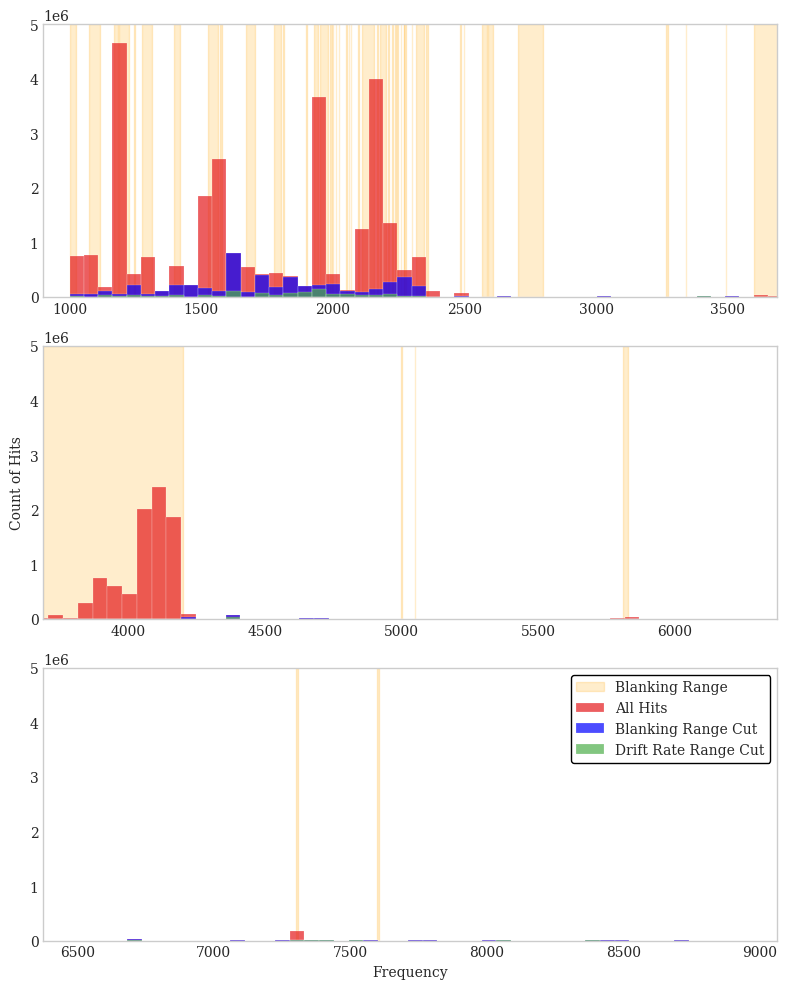

In [17]:
bin = np.linspace(1000, 9064, 150)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

for i, (start, end) in enumerate(blanking_rangeslow):
    ax1.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")

for i, (start, end) in enumerate(blanking_rangesmid):
    ax2.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")

for i, (start, end) in enumerate(blanking_rangeshigh):
    ax3.axvspan(start, end, color='orange', alpha=0.2, zorder=0, label='Blanking Range' if i == 0 else "")


ax1.hist(unblanked_bliss_results1['Uncorrected_Frequency'],  bins=bin, color='#e41a1c', alpha=0.7, label="All Hits", edgecolor='white', linewidth=0.2)
ax1.hist(filtered_low['Uncorrected_Frequency'], bins=bin, color='blue', alpha=0.7, label="Blanking Range Cut", edgecolor='white', linewidth=0.2)
ax1.hist(final_results_low['Uncorrected_Frequency'], bins=bin, color='#4daf4a', alpha=0.7, label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2)
ax1.set_xlim(900, 3688)
ax1.set_ylim(0, 5000000)
ax1.grid(False)

ax2.hist(unblanked_bliss_results2['Uncorrected_Frequency'], bins=bin, color='#e41a1c', alpha=0.7,label="All Hits", edgecolor='white', linewidth=0.2)
ax2.hist(filtered_mid['Uncorrected_Frequency'], bins=bin, color='blue', alpha=0.7,label="Blanking Range Cut", edgecolor='white', linewidth=0.2)
ax2.hist(final_results_mid['Uncorrected_Frequency'], bins=bin, color='#4daf4a', alpha=0.7,label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2)
ax2.set_ylabel('Count of Hits')
ax2.set_xlim(3688, 6376)
ax2.set_ylim(0, 5000000)
ax2.grid(False)

ax3.hist(unblanked_bliss_results3['Uncorrected_Frequency'], bins=bin, color='#e41a1c', alpha=0.7,label="All Hits", edgecolor='white', linewidth=0.2)
ax3.hist(filtered_high['Uncorrected_Frequency'],bins=bin, color='blue', alpha=0.7,label="Blanking Range Cut", edgecolor='white', linewidth=0.2)
ax3.hist(final_results_high['Uncorrected_Frequency'],bins=bin, color='#4daf4a', alpha=0.7, label="Drift Rate Range Cut", edgecolor='white', linewidth=0.2)
ax3.set_xlim(6376, 9064)
ax3.set_ylim(0, 5000000)
ax3.set_xlabel('Frequency')
ax3.grid(False)

#style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 10,
    "legend.fontsize": 10
})
plt.legend(loc='upper right', frameon=True, framealpha=1, edgecolor='black')
plt.tight_layout()

plt.show()